In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
#Load data
medicalData=pd.read_csv("C:\\Users\\busra\\OneDrive\\Masaüstü\\insurance.csv")

In [3]:
medicalData.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
medicalData.shape

(1338, 7)

In [5]:
medicalData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
medicalData.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
#Data Visualization

In [8]:
#1) Gender Column
medicalData["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

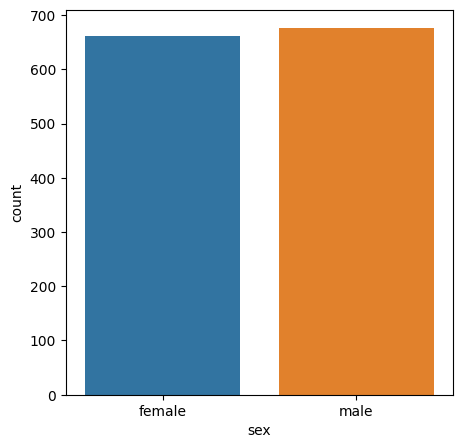

In [9]:
plt.figure(figsize=(5,5))
sns.countplot(x="sex",data=medicalData)
plt.show()

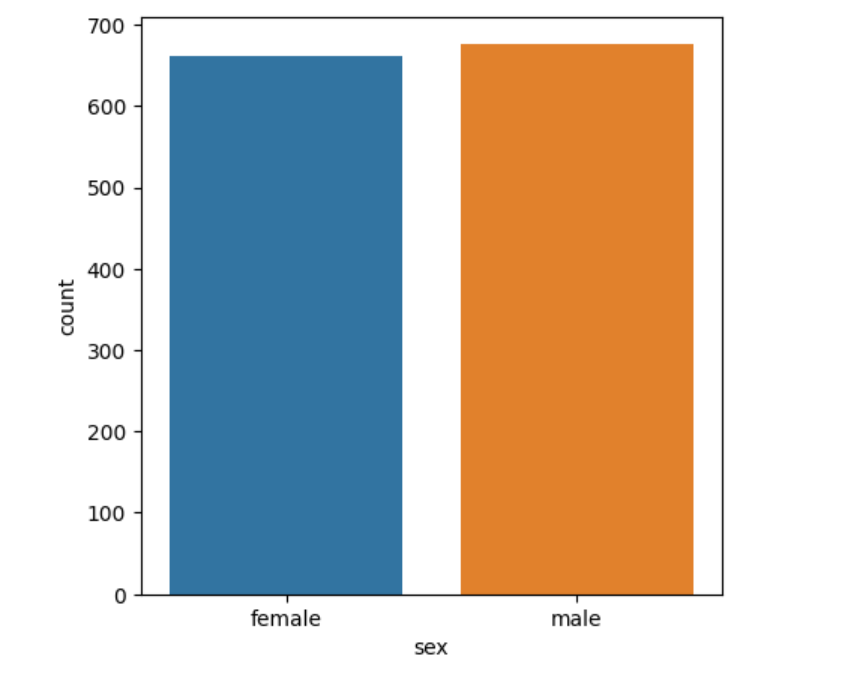

In [10]:
#2)Children Column
medicalData["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

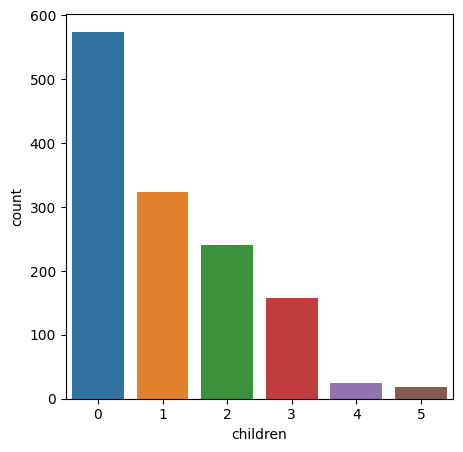

In [11]:
plt.figure(figsize=(5,5))
sns.countplot(x="children",data=medicalData)
plt.show()

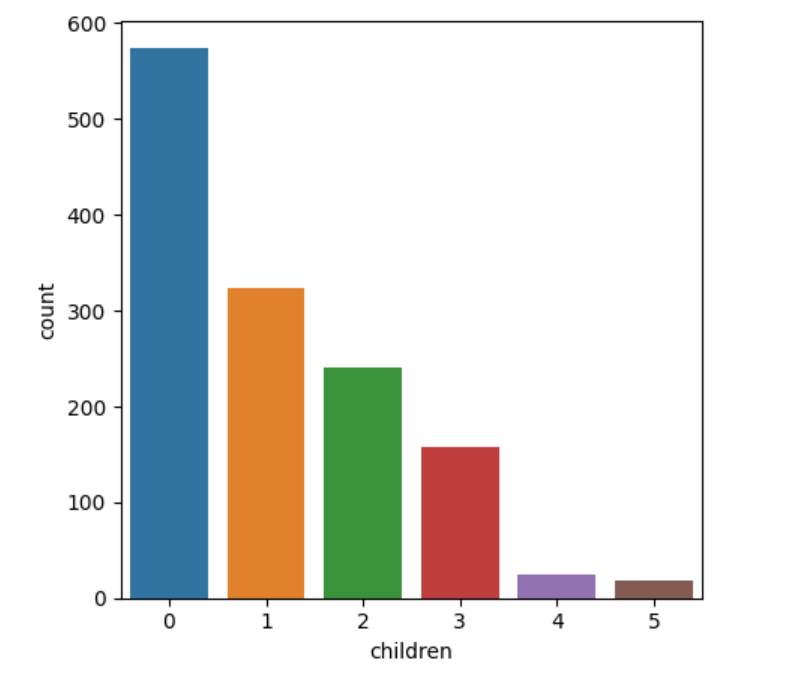

In [12]:
#2)Smoker Column
medicalData["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

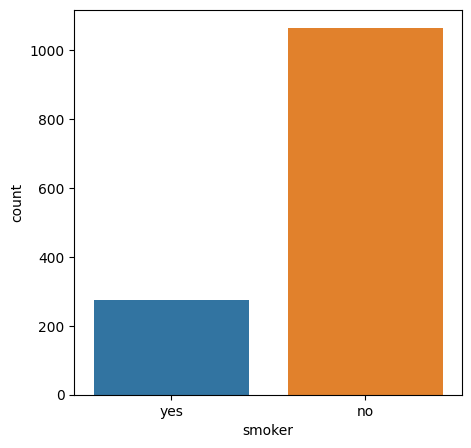

In [13]:
plt.figure(figsize=(5,5))
sns.countplot(x="smoker",data=medicalData)
plt.show()

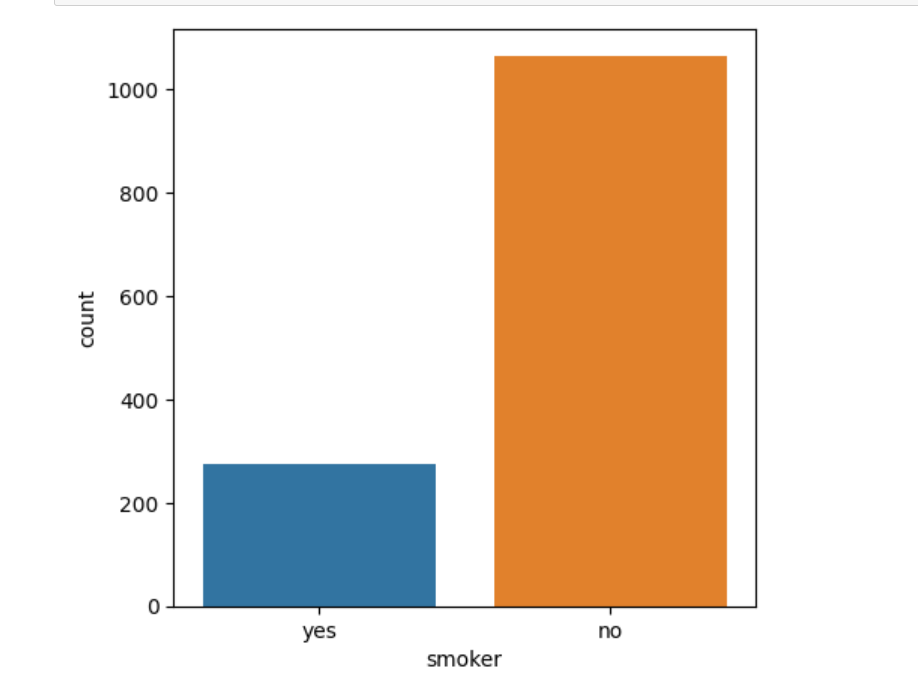

In [14]:
#2)Region Column
medicalData["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

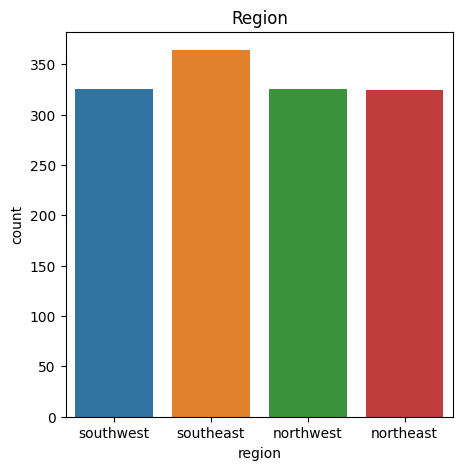

In [15]:
plt.figure(figsize=(5,5))
sns.countplot(x="region",data=medicalData)
plt.title("Region")
plt.show()

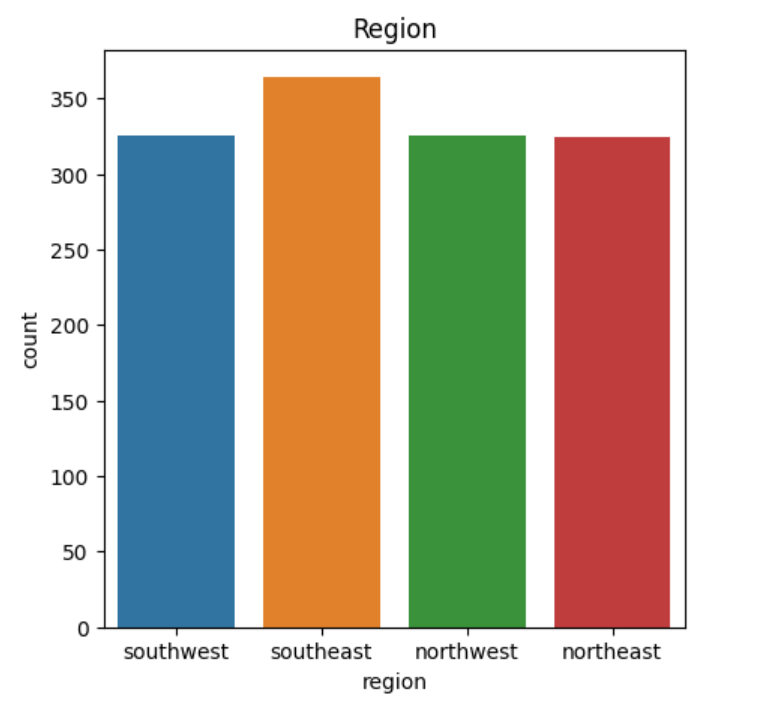

C:\Users\busra\AppData\Local\Temp\ipykernel_4212\51399936.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(medicalData['age'])


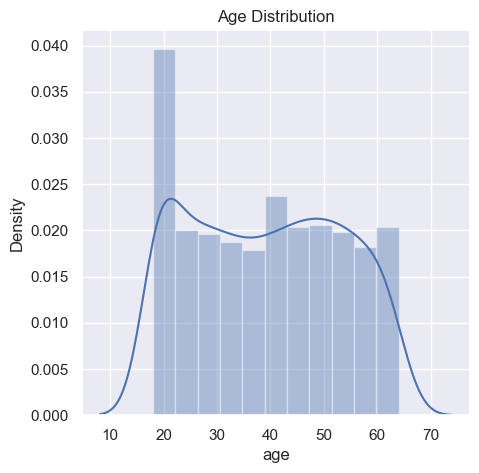

In [16]:
#Distribution of Age Value
sns.set()
plt.figure(figsize=(5,5))
sns.distplot(medicalData['age'])
plt.title('Age Distribution')
plt.show()

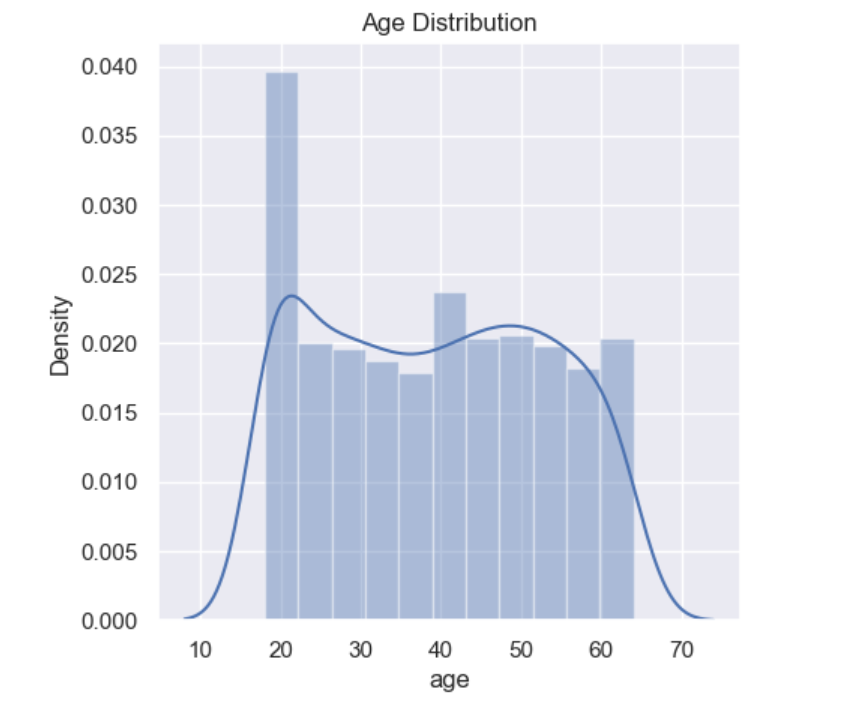

C:\Users\busra\AppData\Local\Temp\ipykernel_4212\2201534730.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(medicalData['bmi'])


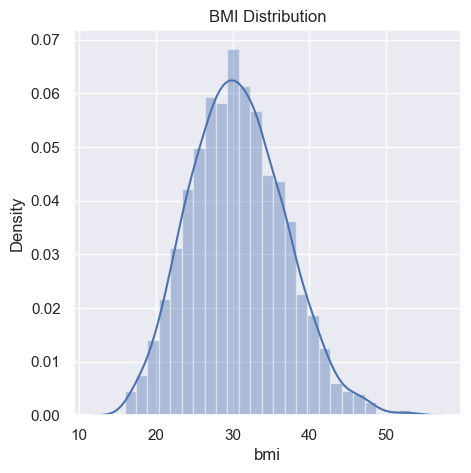

In [17]:
#Distribution of BMI Value
sns.set()
plt.figure(figsize=(5,5))
sns.distplot(medicalData['bmi'])
plt.title('BMI Distribution')
plt.show()

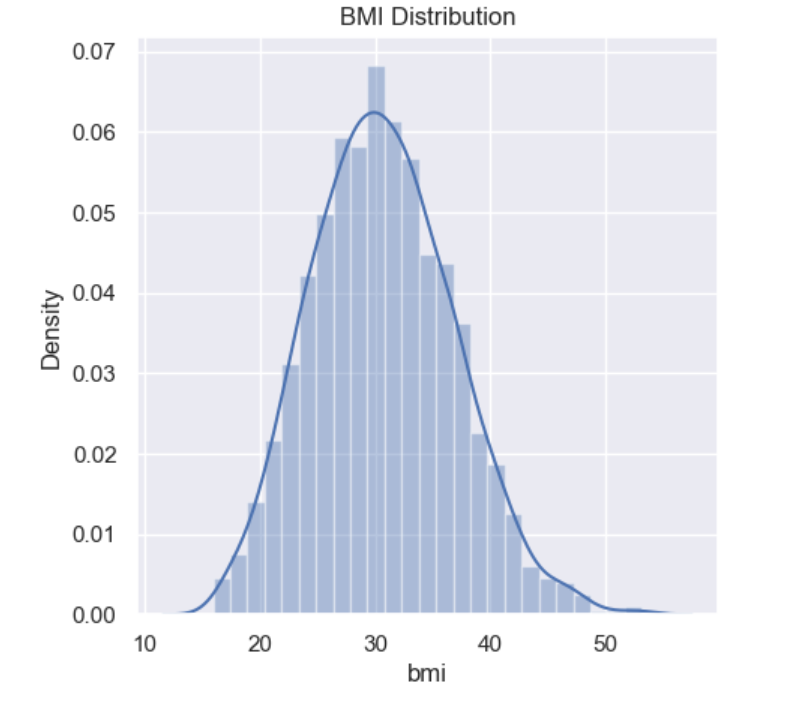

In [18]:
#Edit data

In [19]:
medicalData.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [20]:
medicalData.replace({"sex":{"male":0,"female":1},"smoker":{"no":0,"yes":1},"region":{"southeast":0,"southwest":1,"northwest":2,"northeast":3}},inplace=True)

In [21]:
medicalData.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


In [22]:
#Seperating Features and Targets
X=medicalData.drop(columns=["charges"],axis=1)

In [23]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       1       1
1      18    0  33.770         1       0       0
2      28    0  33.000         3       0       0
3      33    0  22.705         0       0       2
4      32    0  28.880         0       0       2
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       0       2
1334   18    1  31.920         0       0       3
1335   18    1  36.850         0       0       0
1336   21    1  25.800         0       0       1
1337   61    1  29.070         0       1       2

[1338 rows x 6 columns]


In [24]:
Y=medicalData["charges"]

In [25]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [26]:
#Seperatint Train and Test Data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [27]:
print(X_train)

      age  sex     bmi  children  smoker  region
882    21    1  22.135         0       0       3
505    37    0  30.875         3       0       2
798    58    1  33.100         0       0       1
792    22    1  23.180         0       0       3
201    48    1  32.230         1       0       0
...   ...  ...     ...       ...     ...     ...
466    60    1  28.700         1       0       1
299    48    1  28.880         1       0       2
493    61    0  43.400         0       0       1
527    51    1  25.800         1       0       1
1192   58    1  32.395         1       0       3

[1070 rows x 6 columns]


In [28]:
print(X_test)

      age  sex     bmi  children  smoker  region
17     23    0  23.845         0       0       3
1091   55    1  29.830         0       0       3
273    50    0  27.455         1       0       3
270    18    0  29.370         1       0       0
874    44    0  21.850         3       0       3
...   ...  ...     ...       ...     ...     ...
232    19    1  17.800         0       0       1
323    57    0  40.945         0       0       3
1337   61    1  29.070         0       1       2
1066   48    0  37.290         2       0       0
966    51    0  24.795         2       1       2

[268 rows x 6 columns]


In [29]:
print(Y_train)

882      2585.85065
505      6796.86325
798     11848.14100
792      2731.91220
201      8871.15170
           ...     
466     13224.69300
299      9249.49520
493     12574.04900
527      9861.02500
1192    13019.16105
Name: charges, Length: 1070, dtype: float64


In [30]:
print(Y_test)

17       2395.17155
1091    11286.53870
273      9617.66245
270      1719.43630
874      8891.13950
           ...     
232      1727.78500
323     11566.30055
1337    29141.36030
1066     8978.18510
966     23967.38305
Name: charges, Length: 268, dtype: float64


In [31]:
#Linear Regression 
model=LinearRegression()

In [32]:
model.fit(X_train,Y_train)

LinearRegression()

In [33]:
#R Squared Value
X_test_predict=model.predict(X_test)
r2=metrics.r2_score(Y_test,X_test_predict)
print(r2)

0.7454471618659975


In [34]:
#Build a Predictive System
input_data = (31,1,25.74,0,1,0)
input_data_array=np.asarray(input_data)
input_data_reshape=input_data_array.reshape(1,-1)
prediction=model.predict(input_data_reshape)
print('The insurance cost is USD ', prediction[0])

The insurance cost is USD  27559.89117926215


C:\Users\busra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
